# import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from nilearn.input_data import NiftiLabelsMasker
from nilearn import input_data, datasets
from nilearn import plotting
from nilearn.image import new_img_like
import nilearn
import pandas as pd
import scipy

### define a helper function to read the onset/name files
def read_onsets(curr_subject):
    df = pd.read_csv('../data_realcost/onsets/Onsets_RealCost_View_' + curr_subject + '.csv', encoding="ISO-8859-1") 
    df = df[df.PSA != 'Count']
    df = df[df.PSA != 'Imagine'] 
    df = df.PSA.values
    spot_names = []
    for i in range(len(df)):
        spot_names.append(df[i][:-5])
    return spot_names

c:\users\shelby\anaconda3\envs\shelby_neuroimaging\lib\site-packages\nilearn\datasets\__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


### define onsets and subjs

In [2]:
onsets_view   =  [6, 66, 127, 187, 248, 308, 369, 429, 490, 550, 611, 671]
print(len(onsets_view))

onsets_imagine = [47,108,168, 229, 289, 350, 410, 471, 531, 592, 652, 713]
print(len(onsets_imagine))

spots = ['01_The Real Cost Commercial-Your Skin',
         '02_The Real Cost Commercial-Your Teeth',
         '03_The Real Cost Commercial-Alison',
         '04_The Real Cost Commercial-Stay In Control',
         '05_The Real Cost Commercial-Bully',
         '06_The Real Cost Commercial-#7000chemicals',
         '07_The Real Cost Commercial-Dance30_2015_04_10_TESFA',
         '08_The Real Cost Commercial-Band_30_2015_04_10_TESFA',
         '09_The Real Cost Commercial-#ReasonsNotToSmoke',
         '10_The Real Cost Commercial-Any Reason',
         '11_The Real Cost Commercial-Science Class',
         '12_The Real Cost Commercial-Found It']
n_spots = len(spots)
print(n_spots)

subjs = ['PSA038','PSA009','PSA078','PSA153','PSA131','PSA086','PSA144','PSA108','PSA030','PSA041',
         'PSA068','PSA056','PSA132','PSA019','PSA027','PSA028','PSA016','PSA005','PSA061','PSA010',
         'PSA128','PSA003','PSA156','PSA119','PSA032','PSA127','PSA079','PSA094','PSA008','PSA036',
         'PSA112','PSA007','PSA151','PSA120','PSA017','PSA029','PSA026','PSA069','PSA142','PSA109']
n_subjs = len(subjs)
print(len(subjs))

view_length    = 30
imagine_length = 10
tr_shift = 4 

12
12
12
40


### load one person's fMRI data  and that person's onset-file

In [3]:
# this sets up the nested dictionary, which will later be populated with subject- and spot-wise data
subjs_spots_data = {}


# loop over subjects
for curr_subj in range(n_subjs):
    this_subj_name = subjs[curr_subj]
    #print(this_subj_name)
    
    # setting up a field in the nested dictionary
    subjs_spots_data[this_subj_name] = {}

    # loop over 12 spots
    for curr_spot in range(12):
       # print(curr_spot)

        # which file shall we load?
        curr_file   = '../data_realcost/' + subjs[curr_subj] + '_shen_extracted_hp001_lp012_ltr_stand.npy'

        # read this file, i.e. the 735 by 268 'data-carpet', 735 TRs (time) by 268 (regions)
        current_time_series = np.load(curr_file)
        #print(current_time_series.shape)

        # read the corresponding onset-file for this subject: this will tell us when which PSA was shown etc.
        this_subj_spots = read_onsets(subjs[curr_subj]) #PSA003
        #print(*this_subj_spots, sep = "\n")
        #print('-----')
        #print(this_subj_spots[curr_spot])

        # extract - for the current spot - the data: OF note, at this point, we're just extracting the simple mean, 
        # i.e. we average over the whole viewing/imagining duration - 30/15 seconds
        # note: might have to correct for TR-shift - double check
        view_ad_1   = np.mean(current_time_series[onsets_view[curr_spot]+tr_shift: (onsets_view[curr_spot]+view_length+tr_shift), :], axis = 0)
        #print(view_ad_1.shape)

        imagine_ad_1   = np.mean(current_time_series[onsets_imagine[curr_spot]+tr_shift: (onsets_imagine[curr_spot]+imagine_length+tr_shift), :], axis = 0)
        #print(imagine_ad_1.shape)

        # now, having extracted the data, we can add them to a dictionary for later use
        # add the new spot based on its name (this_subj_spots[curr_spot]) to the dictionary
        subjs_spots_data[this_subj_name][this_subj_spots[curr_spot]] = {}

        # then populate this dictionary entry with the values 
        subjs_spots_data[this_subj_name][this_subj_spots[curr_spot]]['position']     = curr_spot;    # which count 0-11 (or 1-12)
        subjs_spots_data[this_subj_name][this_subj_spots[curr_spot]]['view_data']    = view_ad_1;    # the vector corresponding to viewing
        subjs_spots_data[this_subj_name][this_subj_spots[curr_spot]]['imagine_data'] = imagine_ad_1; # the vector corresponding to imagining



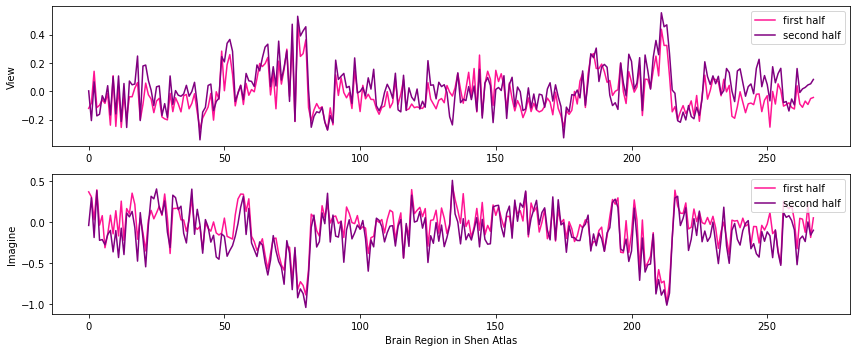

In [4]:
view_1_half1 = []
view_1_half2 = []
imagine_1_half1 = []
imagine_1_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view1 = subjs_spots_data[the_subj_name]['01_The Real Cost Commercial-Your Skin']['view_data']
    view_1_half1.append(view1)
    
    imagine1 = subjs_spots_data[the_subj_name]['01_The Real Cost Commercial-Your Skin']['imagine_data']
    imagine_1_half1.append(imagine1)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    
    view1 =  subjs_spots_data[this_subj_2]['01_The Real Cost Commercial-Your Skin']['view_data']
    view_1_half2.append(view1)
        
    imagine1 = subjs_spots_data[this_subj_2]['01_The Real Cost Commercial-Your Skin']['imagine_data']
    imagine_1_half2.append(imagine1)
   
    curr_subj_2 -= 1
    
    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_1_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_1_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_1_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_1_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

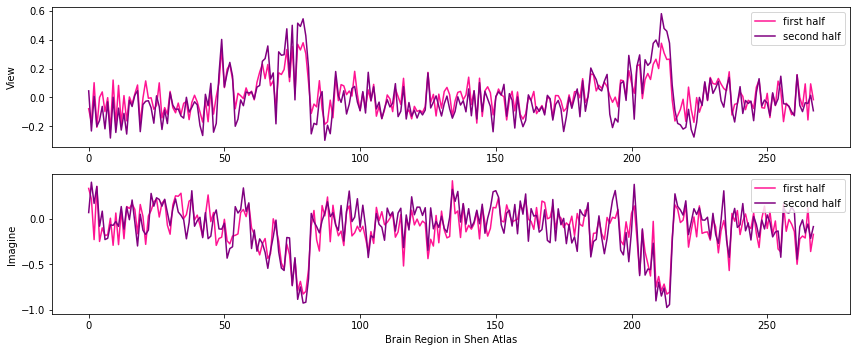

In [5]:
view_2_half1 = []
view_2_half2 = []
imagine_2_half1 = []
imagine_2_half2 = []



for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
   
    #print(the_subj_name)
    view2 = subjs_spots_data[the_subj_name]['02_The Real Cost Commercial-Your Teeth']['view_data']
    view_2_half1.append(view2)
    
    imagine2 = subjs_spots_data[the_subj_name]['02_The Real Cost Commercial-Your Teeth']['imagine_data']
    imagine_2_half1.append(imagine2)
    
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    
    view2 =  subjs_spots_data[this_subj_2]['02_The Real Cost Commercial-Your Teeth']['view_data']
    view_2_half2.append(view2)
    
    imagine2 = subjs_spots_data[this_subj_2]['02_The Real Cost Commercial-Your Teeth']['imagine_data']
    imagine_2_half2.append(imagine2)
    
    #print(view_ad_half2)
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_2_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_2_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_2_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_2_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

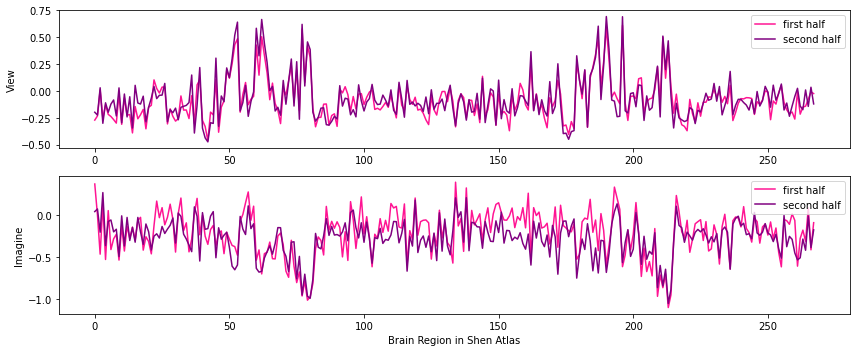

In [6]:
view_3_half1 = []
view_3_half2 = []
imagine_3_half1 = []
imagine_3_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view3 = subjs_spots_data[the_subj_name]['03_The Real Cost Commercial-Alison']['view_data']
    view_3_half1.append(view3)
    
    imagine3 = subjs_spots_data[the_subj_name]['03_The Real Cost Commercial-Alison']['imagine_data']
    imagine_3_half1.append(imagine3)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view3 =  subjs_spots_data[this_subj_2]['03_The Real Cost Commercial-Alison']['view_data']
    view_3_half2.append(view3)
    
    imagine3 = subjs_spots_data[this_subj_2]['03_The Real Cost Commercial-Alison']['imagine_data']
    imagine_3_half2.append(imagine3)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_3_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_3_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_3_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_3_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

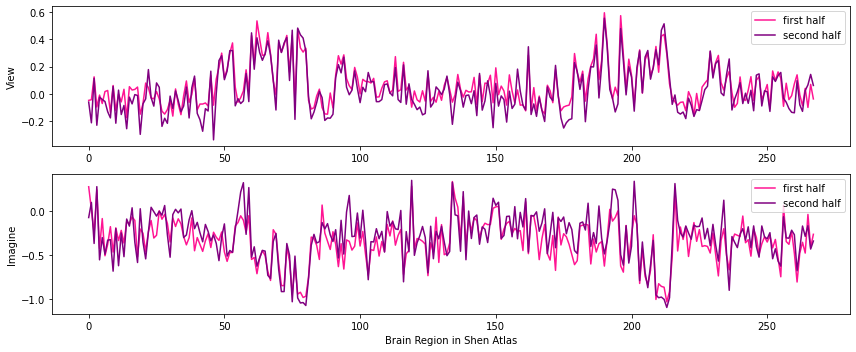

In [7]:
view_4_half1 = []
view_4_half2 = []
imagine_4_half1 = []
imagine_4_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view4 = subjs_spots_data[the_subj_name]['04_The Real Cost Commercial-Stay In Control']['view_data']
    view_4_half1.append(view4)
    
    imagine4 = subjs_spots_data[the_subj_name]['04_The Real Cost Commercial-Stay In Control']['imagine_data']
    imagine_4_half1.append(imagine4)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view4 =  subjs_spots_data[this_subj_2]['04_The Real Cost Commercial-Stay In Control']['view_data']
    view_4_half2.append(view4)
    
    imagine4 = subjs_spots_data[this_subj_2]['04_The Real Cost Commercial-Stay In Control']['imagine_data']
    imagine_4_half2.append(imagine4)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_4_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_4_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_4_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_4_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)


plt.tight_layout()
plt.show()

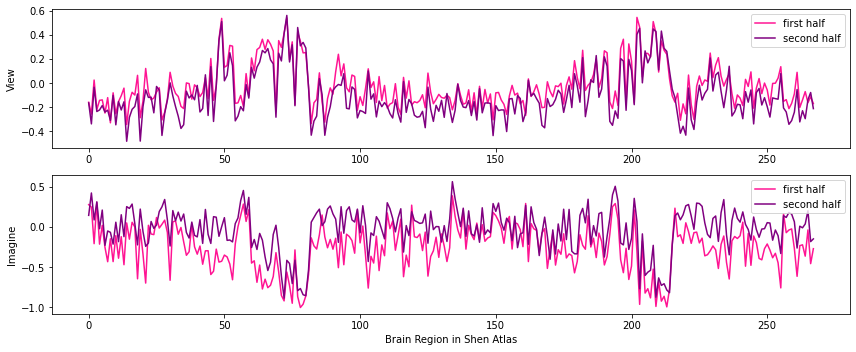

In [8]:
view_5_half1 = []
view_5_half2 = []
imagine_5_half1 = []
imagine_5_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view5 = subjs_spots_data[the_subj_name]['05_The Real Cost Commercial-Bully']['view_data']
    view_5_half1.append(view5)
    
    imagine5 = subjs_spots_data[the_subj_name]['05_The Real Cost Commercial-Bully']['imagine_data']
    imagine_5_half1.append(imagine5)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view5 =  subjs_spots_data[this_subj_2]['05_The Real Cost Commercial-Bully']['view_data']
    view_5_half2.append(view5)
    
    imagine5 = subjs_spots_data[this_subj_2]['05_The Real Cost Commercial-Bully']['imagine_data']
    imagine_5_half2.append(imagine5)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_5_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_5_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_5_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_5_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

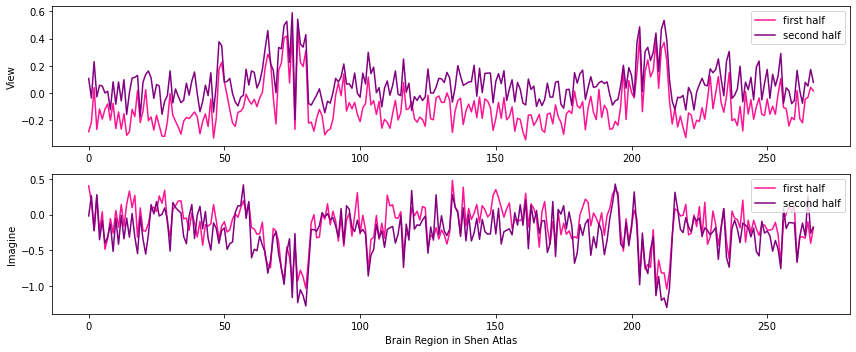

In [9]:
view_6_half1 = []
view_6_half2 = []
imagine_6_half1 = []
imagine_6_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view6 = subjs_spots_data[the_subj_name]['06_The Real Cost Commercial-#7000chemicals']['view_data']
    view_6_half1.append(view6)
    
    imagine6 = subjs_spots_data[the_subj_name]['06_The Real Cost Commercial-#7000chemicals']['imagine_data']
    imagine_6_half1.append(imagine6)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view6 =  subjs_spots_data[this_subj_2]['06_The Real Cost Commercial-#7000chemicals']['view_data']
    view_6_half2.append(view6)
    
    imagine6 = subjs_spots_data[this_subj_2]['06_The Real Cost Commercial-#7000chemicals']['imagine_data']
    imagine_6_half2.append(imagine6)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_6_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_6_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_6_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_6_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

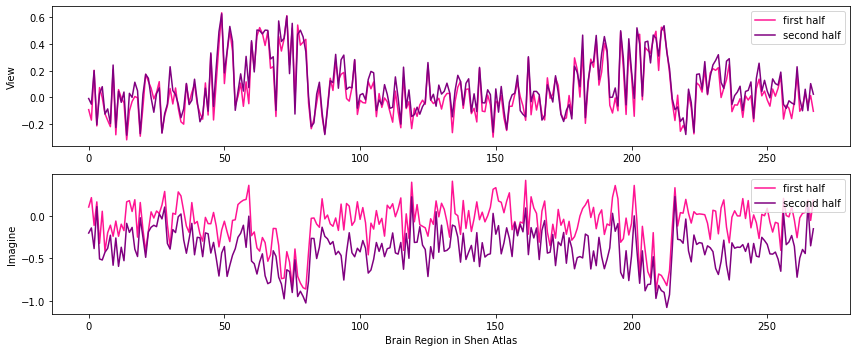

In [10]:
view_7_half1 = []
view_7_half2 = []
imagine_7_half1 = []
imagine_7_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view7 = subjs_spots_data[the_subj_name]['07_The Real Cost Commercial-Dance30_2015_04_10_TESFA']['view_data']
    view_7_half1.append(view7)
    
    imagine7 = subjs_spots_data[the_subj_name]['07_The Real Cost Commercial-Dance30_2015_04_10_TESFA']['imagine_data']
    imagine_7_half1.append(imagine7)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view7 =  subjs_spots_data[this_subj_2]['07_The Real Cost Commercial-Dance30_2015_04_10_TESFA']['view_data']
    view_7_half2.append(view7)
    
    imagine7 = subjs_spots_data[this_subj_2]['07_The Real Cost Commercial-Dance30_2015_04_10_TESFA']['imagine_data']
    imagine_7_half2.append(imagine7)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_7_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_7_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_7_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_7_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

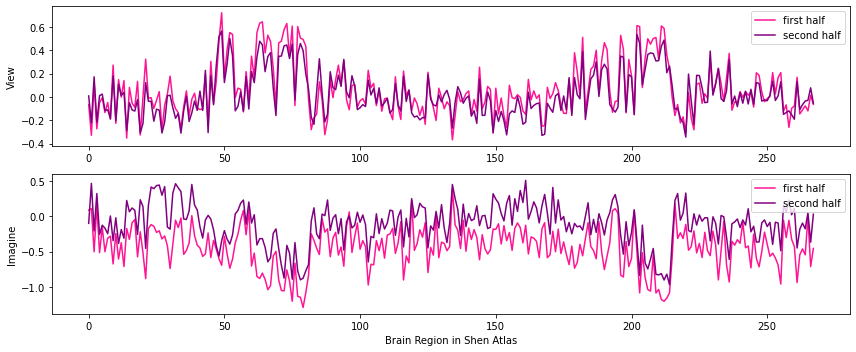

In [11]:
view_8_half1 = []
view_8_half2 = []
imagine_8_half1 = []
imagine_8_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view8 = subjs_spots_data[the_subj_name]['08_The Real Cost Commercial-Band_30_2015_04_10_TESFA']['view_data']
    view_8_half1.append(view8)
    
    imagine8 = subjs_spots_data[the_subj_name]['08_The Real Cost Commercial-Band_30_2015_04_10_TESFA']['imagine_data']
    imagine_8_half1.append(imagine8)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view8 =  subjs_spots_data[this_subj_2]['08_The Real Cost Commercial-Band_30_2015_04_10_TESFA']['view_data']
    view_8_half2.append(view8)
    
    imagine8 = subjs_spots_data[this_subj_2]['08_The Real Cost Commercial-Band_30_2015_04_10_TESFA']['imagine_data']
    imagine_8_half2.append(imagine8)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_8_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_8_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_8_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_8_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

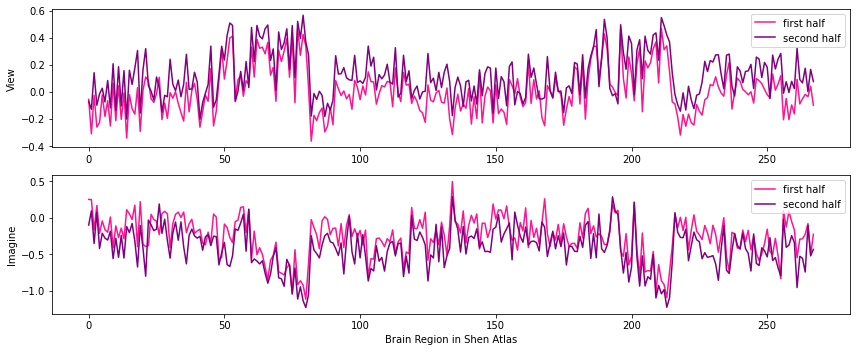

In [12]:
view_9_half1 = []
view_9_half2 = []
imagine_9_half1 = []
imagine_9_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view9 = subjs_spots_data[the_subj_name]['09_The Real Cost Commercial-#ReasonsNotToSmoke']['view_data']
    view_9_half1.append(view9)
    
    imagine9 = subjs_spots_data[the_subj_name]['09_The Real Cost Commercial-#ReasonsNotToSmoke']['imagine_data']
    imagine_9_half1.append(imagine9)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view9 =  subjs_spots_data[this_subj_2]['09_The Real Cost Commercial-#ReasonsNotToSmoke']['view_data']
    view_9_half2.append(view9)
    
    imagine9 = subjs_spots_data[this_subj_2]['09_The Real Cost Commercial-#ReasonsNotToSmoke']['imagine_data']
    imagine_9_half2.append(imagine9)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_9_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_9_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_9_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_9_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

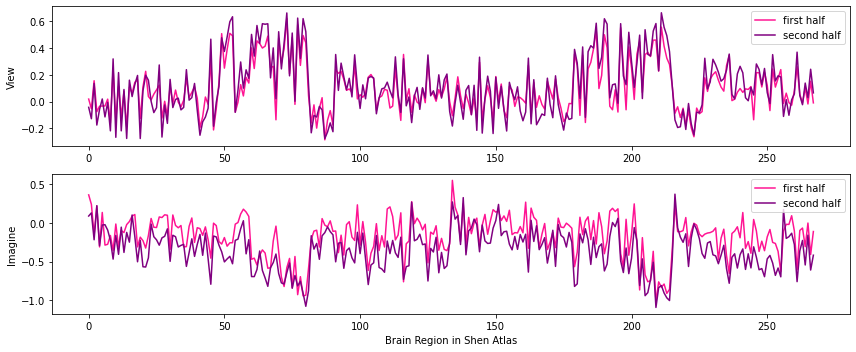

In [13]:
view_10_half1 = []
view_10_half2 = []
imagine_10_half1 = []
imagine_10_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view10 = subjs_spots_data[the_subj_name]['10_The Real Cost Commercial-Any Reason']['view_data']
    view_10_half1.append(view10)
    
    imagine10 = subjs_spots_data[the_subj_name]['10_The Real Cost Commercial-Any Reason']['imagine_data']
    imagine_10_half1.append(imagine10)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view10 =  subjs_spots_data[this_subj_2]['10_The Real Cost Commercial-Any Reason']['view_data']
    view_10_half2.append(view10)
    
    imagine10 = subjs_spots_data[this_subj_2]['10_The Real Cost Commercial-Any Reason']['imagine_data']
    imagine_10_half2.append(imagine10)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_10_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_10_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_10_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_10_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

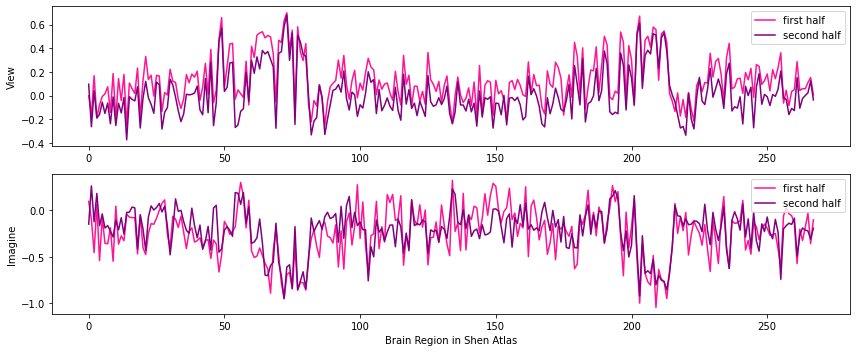

In [14]:
view_11_half1 = []
view_11_half2 = []
imagine_11_half1 = []
imagine_11_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view11 = subjs_spots_data[the_subj_name]['11_The Real Cost Commercial-Science Class']['view_data']
    view_11_half1.append(view11)
    
    imagine11 = subjs_spots_data[the_subj_name]['11_The Real Cost Commercial-Science Class']['imagine_data']
    imagine_11_half1.append(imagine11)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view11 =  subjs_spots_data[this_subj_2]['11_The Real Cost Commercial-Science Class']['view_data']
    view_11_half2.append(view11)
    
    imagine11 = subjs_spots_data[this_subj_2]['11_The Real Cost Commercial-Science Class']['imagine_data']
    imagine_11_half2.append(imagine11)
    
    curr_subj_2 -= 1

    
plt.figure(figsize = (12,5))
plt.subplot(211)
plt.plot(np.mean(view_11_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_11_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(212)
plt.plot(np.mean(imagine_11_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_11_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

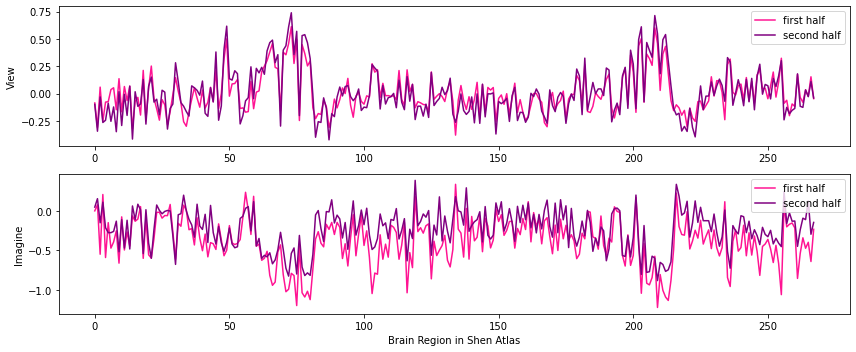

In [15]:
view_12_half1 = []
view_12_half2 = []
imagine_12_half1 = []
imagine_12_half2 = []


for curr_subj in range(20):
    #print(curr_subj)
    the_subj_name = subjs[curr_subj]
    #print(the_subj_name)
    view12 = subjs_spots_data[the_subj_name]['12_The Real Cost Commercial-Found It']['view_data']
    view_12_half1.append(view12)
    
    imagine12 = subjs_spots_data[the_subj_name]['12_The Real Cost Commercial-Found It']['imagine_data']
    imagine_12_half1.append(imagine12)
 
curr_subj_2 = 39

while curr_subj_2 >= 20 :
    this_subj_2 =subjs[curr_subj_2]
    view12 =  subjs_spots_data[this_subj_2]['12_The Real Cost Commercial-Found It']['view_data']
    view_12_half2.append(view12)
    
    imagine12 = subjs_spots_data[this_subj_2]['12_The Real Cost Commercial-Found It']['imagine_data']
    imagine_12_half2.append(imagine12)
    
    curr_subj_2 -= 1

#12    
plt.figure(figsize = (12,5))
plt.subplot(2,1,1)
plt.plot(np.mean(view_12_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(view_12_half2, axis=0), label="second half", color= "purple")
plt.ylabel("View")
plt.legend(loc=1)

plt.subplot(2,1,2)
plt.plot(np.mean(imagine_12_half1, axis =0), label="first half", color="deeppink")
plt.plot(np.mean(imagine_12_half2, axis=0), label="second half", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Imagine")
plt.legend(loc=1)

plt.tight_layout()
plt.show()